In [1]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import random
plt.style.use('seaborn-poster')

In [2]:
%matplotlib notebook

In [16]:
def Readpxpypz(filepath, px, py, pz):
    with open(filepath, 'r') as file:
        lines = file.readlines()
    cur_exp = []
    experiments = []
    first = True

    for line in lines:
        if line.startswith('E'):
            if first and not cur_exp:
                first = False
            else:
                experiments.append(cur_exp)
                cur_exp = []
        elif line.startswith('P'):
            pdata = line.split()
            cur_par = [int(pdata[2]), float(pdata[3]),
                               float(pdata[4]), float(pdata[5]),
                               float(pdata[6]), float(pdata[6]),
                               float(pdata[7]), int(pdata[11])]
            if cur_par[7] == 0:
                px.append(cur_par[1]+20)
                py.append(cur_par[2]+20)
                pz.append(cur_par[3]+20)
            cur_exp.append(cur_par)
        if line == 'HepMC::IO_GenEvent-END_EVENT_LISTING':
            experiments.append(cur_exp)
            break

<IPython.core.display.Javascript object>


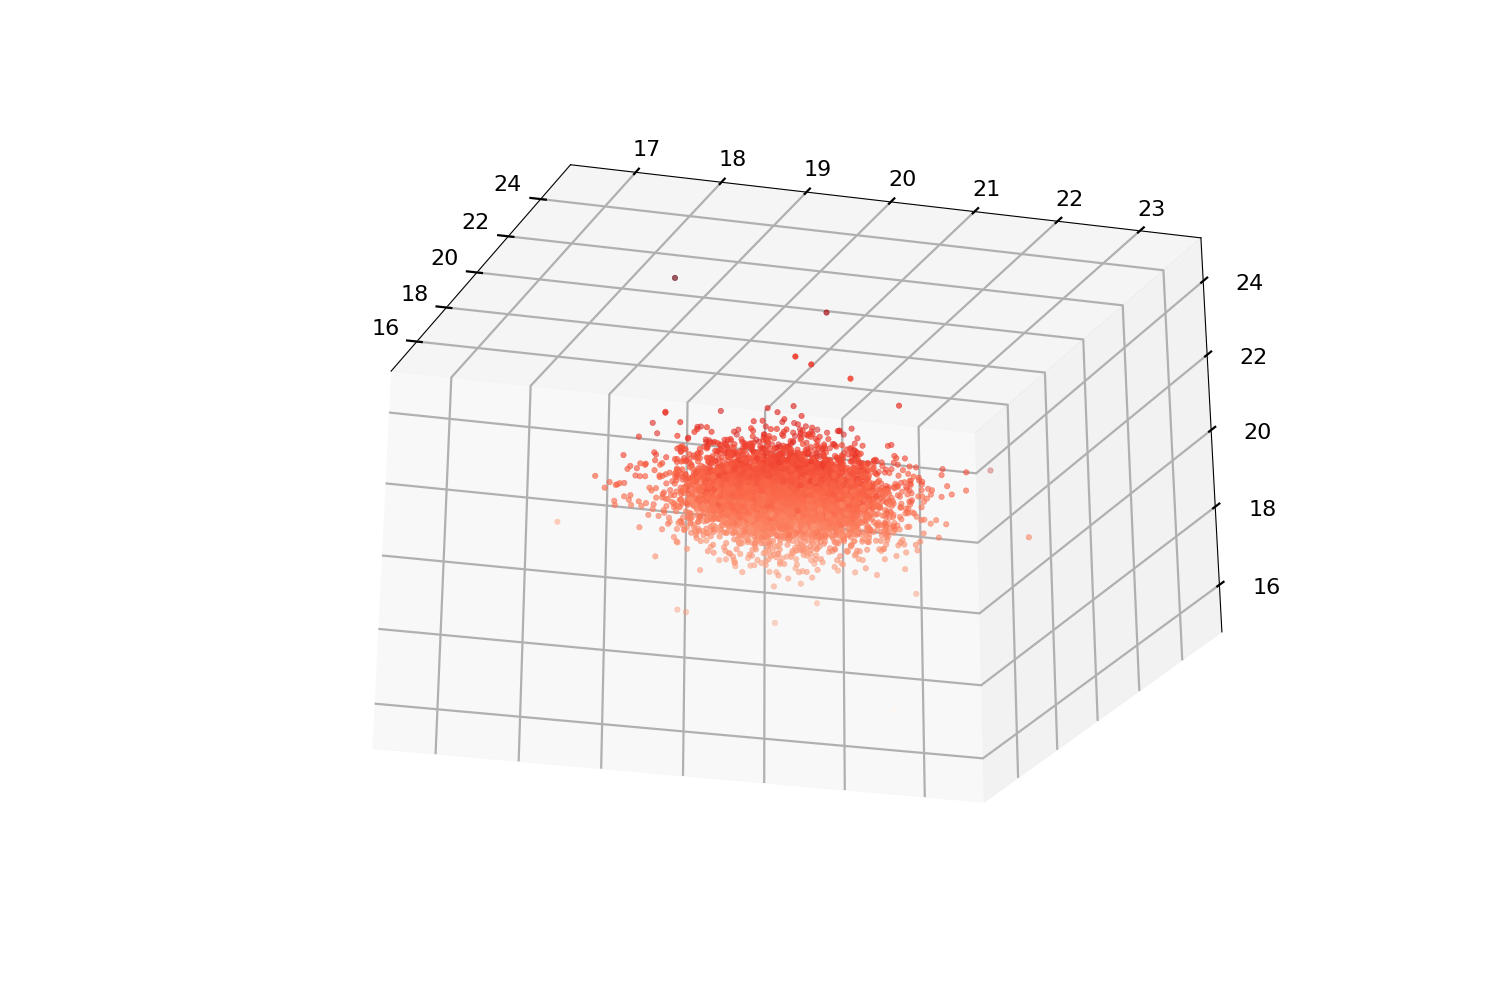

In [17]:
fig = plt.figure(figsize = (15,10))
ax = plt.subplot(projection = '3d')
# ax.set_xlim([-20, 20])  # Set x-axis limits
# ax.set_ylim([-20, 20])  # Set y-axis limits
# ax.set_zlim([-20, 20])    # Set z-axis limits
x = []
y = []
z = []
Readpxpypz('hepMCtest', x, y, z)
ax.scatter(x,y,z,s=15,c=z,cmap='Reds')
plt.show()

In [8]:
##Read the file and construct the tree
# dtype = [('pdgid', int), ('px', float), ('py', float),
#          ('pz', float), ('energy', float), ('mass', float), ('vertex', int)]
def ReadFile(filepath, experiments):
    with open(filepath, 'r') as file:
        lines = file.readlines()
    
    cur_ver = []
    cur_exp = {}
    first_exp = True
#     first_ver = True
    vertex = 0
    
    for line in lines:
        if line.startswith('E'):
            if vertex != 0:
                cur_exp[vertex] = cur_ver
#                 print(cur_ver)
                experiments.append(cur_exp)
                cur_exp = {}
#                 for exp in experiments:
#                     for pars in exp.values():
#                         for par in pars:
#                             print(par)
                vertex = 0
        elif line.startswith('V'):
            if vertex != 0:
                cur_exp[vertex] = cur_ver 
            cur_ver = []
            vertex += 1
        elif line.startswith('P'):
            pdata = line.split()
            cur_par = [int(pdata[2]), float(pdata[3]),
                               float(pdata[4]), float(pdata[5]),
                               float(pdata[6]), float(pdata[6]),
                               float(pdata[7]), int(pdata[11]), vertex]
            cur_ver.append(cur_par)

            
        if line == 'HepMC::IO_GenEvent-END_EVENT_LISTING':
            cur_exp[vertex] = cur_ver
            experiments.append(cur_exp)
            break
    
#     i = 1
#     for exp in experiments:
#         print('exp: ', i)
#         i += 1
#         j = 1
#         for pars in exp.values():
#             print('ver: ', j)
#             j += 1
#             for par in pars:
#                 print(par)

In [12]:
experiments = []
ReadFile('hepMCtest', experiments)
pars = experiments[999][11]
for par in pars:
    print(par)

[22, 0.4681571996780152, -0.2998417907688053, 0.018909026369537178, 0.5562677542155836, 0.5562677542155836, 7.450580596923828e-09, 0, 11]
[22, 0.3164733153127161, -0.2645628380176466, -0.0902921322598286, 0.42225765086378214, 0.42225765086378214, 7.450580596923828e-09, 0, 11]
